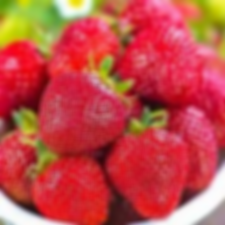

In [6]:
import math
from PIL import Image

def create_gaussian_kernel(size, sigma):
    """Создание гауссова ядра"""
    kernel = [[0] * size for _ in range(size)]
    center = size // 2
    sum_val = 0.0

    for i in range(size):
        for j in range(size):
            x = i - center
            y = j - center
            kernel[i][j] = math.exp(-(x**2 + y**2) / (2 * sigma**2))
            sum_val += kernel[i][j]

    # Нормализация ядра
    for i in range(size):
        for j in range(size):
            kernel[i][j] /= sum_val

    return kernel

def apply_gaussian_blur_pil(image_path, output_path, kernel_size=5, sigma=1.0):
    """Применение гауссова размытия к изображению"""
    # Открываем изображение
    img = Image.open(image_path)
    pixels = img.load()
    width, height = img.size

    # Создаем гауссово ядро
    kernel = create_gaussian_kernel(kernel_size, sigma)
    offset = kernel_size // 2

    # Создаем новое изображение для результата
    result = Image.new(img.mode, (width, height))
    result_pixels = result.load()

    # Применяем свертку
    for x in range(width):
        for y in range(height):
            r_sum, g_sum, b_sum = 0, 0, 0

            for i in range(kernel_size):
                for j in range(kernel_size):
                    # Координаты в исходном изображении
                    img_x = min(max(x + i - offset, 0), width - 1)
                    img_y = min(max(y + j - offset, 0), height - 1)

                    # Получаем цвет пикселя
                    r, g, b = pixels[img_x, img_y]

                    # Умножаем на коэффициент ядра
                    weight = kernel[i][j]
                    r_sum += r * weight
                    g_sum += g * weight
                    b_sum += b * weight

            # Записываем результат
            result_pixels[x, y] = (int(r_sum), int(g_sum), int(b_sum))

    # Сохраняем результат
    result.save(output_path)
    return result

# Использование
apply_gaussian_blur_pil('/content/клубничке.jpg', 'output.jpg', kernel_size=8, sigma=2.5)

array([[[  9, 144,  86],
        [  8, 144,  86],
        [  7, 143,  86],
        ...,
        [ 77, 240, 242],
        [ 78, 241, 242],
        [ 78, 241, 242]],

       [[  8, 144,  86],
        [  8, 144,  86],
        [  7, 143,  86],
        ...,
        [ 76, 240, 241],
        [ 76, 240, 241],
        [ 77, 241, 241]],

       [[  8, 145,  86],
        [  7, 144,  86],
        [  7, 144,  86],
        ...,
        [ 72, 239, 239],
        [ 73, 240, 240],
        [ 73, 240, 240]],

       ...,

       [[124, 150, 144],
        [127, 153, 146],
        [137, 160, 152],
        ...,
        [154, 139, 163],
        [154, 139, 163],
        [154, 139, 163]],

       [[117, 146, 140],
        [120, 148, 142],
        [130, 155, 148],
        ...,
        [154, 139, 163],
        [154, 139, 163],
        [153, 139, 163]],

       [[115, 144, 139],
        [118, 146, 141],
        [128, 153, 146],
        ...,
        [153, 139, 163],
        [153, 139, 163],
        [153, 139, 163]]], dtype=uint8)
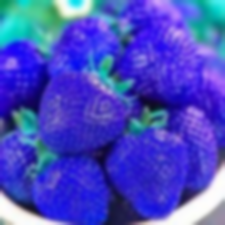

In [7]:
import cv2
import numpy as np

def gaussian_blur_opencv(image_path, output_path, kernel_size=5, sigma=1.0):
    """
    Гауссово размытие с использованием OpenCV
    kernel_size: должен быть нечетным положительным числом
    sigma: стандартное отклонение по X
    """
    # Читаем изображение
    img = cv2.imread(image_path)

    if img is None:
        raise ValueError(f"Не удалось загрузить изображение: {image_path}")

    # Применяем гауссово размытие
    blurred = cv2.GaussianBlur(img, (kernel_size, kernel_size), sigma)

    # Сохраняем результат
    cv2.imwrite(output_path, blurred)

    return blurred

def gaussian_blur_with_details(image_path, output_path, kernel_size=5, sigma_x=1.0, sigma_y=None):
    """
    Более продвинутая версия с возможностью разных сигм по осям
    """
    img = cv2.imread(image_path)

    if sigma_y is None:
        sigma_y = sigma_x

    # Применяем гауссово размытие
    blurred = cv2.GaussianBlur(img, (kernel_size, kernel_size), sigmaX=sigma_x, sigmaY=sigma_y)

    # Сохраняем
    cv2.imwrite(output_path, blurred)

    # Для сравнения можно показать оригинал и результат
    cv2.imshow('Original', img)
    cv2.imshow('Blurred', blurred)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    return blurred

# Использование
gaussian_blur_opencv('/content/клубничке.jpg', 'output.jpg', kernel_size=9, sigma=2.0)